In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('Digit_data.csv')

In [ ]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df.shape

(39008, 785)

In [ ]:
df.sample()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
32281,9,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


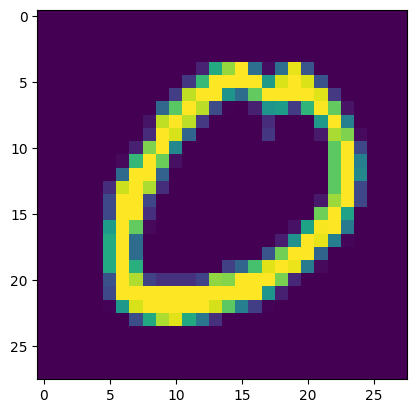

In [ ]:
plt.imshow(df.iloc[13051,1:].values.reshape(28,28))

In [ ]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
X_train.shape

(31206, 784)

In [ ]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
X_train_clean = X_train[~np.isnan(X_train).any(axis=1)]
y_train_clean = y_train[~np.isnan(X_train).any(axis=1)]

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
knn.fit(X_train_clean, y_train_clean)

KNeighborsClassifier()

In [ ]:
import time
start = time.time()
y_pred = knn.predict(X_test)
print(time.time() - start)

15.961567401885986


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9651371443219687

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=100)

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA

# Step 1: Impute missing values
imputer = SimpleImputer(strategy='mean')

# Fit and transform X_train
X_train_imputed = imputer.fit_transform(X_train)

# Transform X_test (use same imputer fitted on X_train)
X_test_imputed = imputer.transform(X_test)

# Fit PCA on X_train and transform
X_train_trf = pca.fit_transform(X_train_imputed)

# Transform X_test using the same PCA
X_test_trf = pca.transform(X_test_imputed)

In [ ]:
X_train_trf.shape

(31206, 100)

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
knn.fit(X_train_trf,y_train)

KNeighborsClassifier()

In [ ]:
KNeighborsClassifier()

KNeighborsClassifier()

In [ ]:
y_pred = knn.predict(X_test_trf)

In [ ]:
accuracy_score(y_test,y_pred)

0.9503973340169187

In [ ]:
for i in range(1, 10):
    # Apply PCA
    pca = PCA(n_components=i)
    X_train_trf = pca.fit_transform(X_train_imputed)
    X_test_trf = pca.transform(X_test_imputed)

    # Train KNN
    knn = KNeighborsClassifier()
    knn.fit(X_train_trf, y_train)

    # Predict and evaluate accuracy
    y_pred = knn.predict(X_test_trf)
    accuracy = accuracy_score(y_test, y_pred)

    # Print accuracy for each number of components
    print(f"Accuracy with {i} PCA components: {accuracy:.4f}")

Accuracy with 1 PCA components: 0.2629
Accuracy with 2 PCA components: 0.3321
Accuracy with 3 PCA components: 0.5074
Accuracy with 4 PCA components: 0.6643
Accuracy with 5 PCA components: 0.7329
Accuracy with 6 PCA components: 0.8225
Accuracy with 7 PCA components: 0.8372
Accuracy with 8 PCA components: 0.8702
Accuracy with 9 PCA components: 0.8789


In [ ]:
pca = PCA(n_components=2)

# Fit PCA on X_train and transform
X_train_trf = pca.fit_transform(X_train_imputed)

# Transform X_test using the same PCA
X_test_trf = pca.transform(X_test_imputed)

In [ ]:
X_train_trf

array([[-2.3562392 ,  2.40255004],
       [-1.37634194, -3.61421462],
       [-4.58132585,  0.51539831],
       ...,
       [ 2.19024993,  0.74935081],
       [ 1.09234389,  1.12461208],
       [17.80751053,  1.72192698]])

In [47]:
import plotly.express as px
y_train_trf = y_train.astype(str)
fig = px.scatter(x=X_train_trf[:,0],
                 y=X_train_trf[:,1],
                 color=y_train_trf,
                 color_discrete_sequence=px.colors.qualitative.G10
                )
fig.show()

In [49]:
# transforming in 3D
pca = PCA(n_components=3)

# Fit PCA on X_train and transform
X_train_trf = pca.fit_transform(X_train_imputed)

# Transform X_test using the same PCA
X_test_trf = pca.transform(X_test_imputed)

In [50]:
X_train_trf

array([[-2.3562392 ,  2.40255004,  5.5710871 ],
       [-1.37634194, -3.61421462, -9.53805042],
       [-4.58132585,  0.51539831,  5.40829233],
       ...,
       [ 2.19024993,  0.74935081, -0.7789447 ],
       [ 1.09234389,  1.12461208,  3.80053231],
       [17.80751053,  1.72192698, -4.89200111]])

In [51]:
import plotly.express as px
y_train_trf = y_train.astype(str)
fig = px.scatter_3d(df, x=X_train_trf[:,0], y=X_train_trf[:,1], z=X_train_trf[:,2],
              color=y_train_trf)
fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
    paper_bgcolor="LightSteelBlue",
)
fig.show()